<a href="https://colab.research.google.com/github/kplr-training/Data-Statistics-Python/blob/main/Exercices/5_Probability_(using_Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Concrete Introduction to Probability (using Python)**

En 1814, Pierre-Simon Laplace écrit :

- La théorie des probabilités n'est rien d'autre que le bon sens réduit au calcul. ... [La probabilité] est donc simplement une fraction dont le numérateur est le nombre de cas favorables et dont le dénominateur est le nombre de tous les cas possibles ... alors que rien ne permet de s'attendre à ce que l'un de ces cas se produise plus que n'importe lequel autre.

Laplace
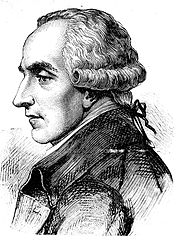

- Pour démêler un problème de probabilité, tout ce que vous avez à faire est de définir exactement quels sont les cas, et de compter soigneusement les cas favorables et totaux. Soyons clairs sur nos mots de vocabulaire :

- [Essai](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29)Une occurrence unique avec un résultat incertain jusqu'à ce que nous l'observions.
Par exemple, lancer un seul dé.
- [Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29) : résultat possible d'un procès ; un état particulier du monde. Ce que Laplace appelle un cas.
Par exemple : 4.
Espace d'échantillonnage : L'ensemble de tous les résultats possibles pour l'essai.
Par exemple, {1, 2, 3, 4, 5, 6}.
- [Événement](https://en.wikipedia.org/wiki/Event_(probability_theory%29) : un sous-ensemble de l'espace d'échantillonnage, un ensemble de résultats qui, ensemble, ont une propriété qui nous intéresse.
Par exemple, l'événement "même lancer de dé" est l'ensemble des résultats {2, 4, 6}.
- Probabilité : Comme l'a dit Laplace, la probabilité d'un événement par rapport à un espace d'échantillonnage est le « nombre de cas favorables » (résultats de l'espace d'échantillonnage qui sont dans l'événement) divisé par le « nombre de tous les cas » dans l'espace d'échantillonnage.
- l'espace d'échantillonnage (en supposant que "rien ne nous amène à attendre que l'un de ces cas se produise plus que tout autre").
- Puisqu'il s'agit d'une fraction propre, la probabilité sera toujours un nombre compris entre 0 (représentant un événement impossible) et 1 (représentant un certain événement).

Par exemple, la probabilité d'un d pair

In [ ]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)), 
                    cases(space))

favorable = set.intersection # Outcomes that are in the event and in the sample space
cases     = len              # The number of cases is the length, or size, of a set

# **Problem 1 : Die Roll**

+ Quelle est la probabilité d'obtenir un nombre pair avec un seul dé équitable à six faces ? Les mathématiciens utilisent traditionnellement une seule lettre majuscule pour désigner un espace échantillon ;

## TO_DO
- Quelle est la probabilité d'obtenir un nombre pair avec un seul dé équitable à six faces ?
- (Utiliser la fonction P(event , space))

In [ ]:
#fill_here

Fraction(1, 2)

## TO_DO

+ Quelle est la probabilité d'obtenir un nombre impair avec un seul dé équitable à six faces ? Les mathématiciens utilisent traditionnellement une seule lettre majuscule pour désigner un espace échantillon ;

In [ ]:
#fill_here

- La probabilité d'un jet de dé pair ou premier ?

In [ ]:
#fill_here

Fraction(5, 6)

- La probabilité d'un jet de dé impair et premier ?

In [ ]:
#fill_here

Fraction(1, 3)

# **Problem 2 : Card**

- Consider dealing a hand of five playing cards. An individual card has a rank and suit, like 'J♥' for the Jack of Hearts, and a deck has 52 cards:

In [ ]:
suits = u'♥♠♦♣'
ranks = u'AKQJT98765432'
deck  = [r + s for r in ranks for s in suits]
len(deck)

52

- Now I want to define Hands as the sample space of all 5-card combinations from deck. The function itertools.combinations does most of the work; we than concatenate each combination into a space-separated string:

In [ ]:
import itertools

def combos(items, n):
    "All combinations of n items; each combo as a space-separated str."
    return set(map(' '.join, itertools.combinations(items, n)))

Hands = combos(deck, 5)
len(Hands)

2598960

- There are too many hands to look at them all, but we can sample:

In [ ]:
import random
random.sample(Hands, 7)

['A♦ 9♣ 5♣ 3♣ 2♠',
 'K♥ K♣ J♥ T♦ 3♦',
 'K♠ K♦ Q♣ 6♦ 3♠',
 'A♣ J♦ 9♠ 6♥ 2♠',
 'K♥ 7♥ 7♠ 6♠ 4♥',
 'K♥ 8♠ 7♣ 5♣ 2♣',
 'Q♣ J♦ 4♥ 4♣ 2♠']

In [ ]:
random.sample(deck, 7)

['2♣', '3♥', '2♠', 'T♠', '9♥', '7♠', 'T♣']

- Now we can answer questions like the probability of being dealt a flush (5 cards of the same suit):

In [ ]:
#fill_here

Fraction(33, 16660)

- Or the probability of four of a kind:

In [ ]:
#fill_here  5
.-6

Fraction(1, 4165)

# **Urn Problems**

- Around 1700, Jacob Bernoulli wrote about removing colored balls from an urn in his landmark treatise Ars Conjectandi, and ever since then, explanations of probability have relied on urn problems. (You'd think the urns would be empty by now.)

- For example, here is a three-part problem adapted from mathforum.org:

- An urn contains 6 blue, 9 red, and 8 white balls. We select six balls at random. What is the probability of each of these outcomes:

    - All balls are red.
    - 3 are blue, and 1 is red, and 2 are white, .
    - Exactly 4 balls are white.

- We'll start by defining the contents of the urn.
- A set can't contain multiple objects that are equal to each other, so I'll call the blue balls 'B1' through 'B6', rather than trying to have 6 balls all called 'B':

In [ ]:
def balls(color, n):
    "A set of n numbered balls of the given color."
    return {color + str(i)
            for i in range(1, n + 1)}

urn = balls('B', 6) | balls('R', 9) | balls('W', 8)
urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

Now we can define the sample space, U6, as the set of all 6-ball combinations:

In [ ]:
U6 = combos(urn, 6)

random.sample(U6, 5)

['W3 R4 B1 W4 R1 R9',
 'R5 W3 R4 R2 B6 R1',
 'W7 R5 B1 W1 R8 R9',
 'W7 W5 B5 B1 B6 W4',
 'W8 R5 W3 R7 R8 R9']

Define select such that select('R', 6) is the event of picking 6 red balls from the urn:

In [ ]:

def select(color, n, space=U6):
    "The subset of the sample space with exactly `n` balls of given `color`."
    return {s for s in space if s.count(color) == n}

Now WE can answer the three questions:

Calculate the probability to get 6 red balls from the the urn

In [ ]:
#fill_here 

Fraction(4, 4807)

Calculate the probability to get 3 blue balls and 1 red ball and 2 white balls

In [ ]:
#fill_here

Fraction(240, 4807)

calculate the probability to get 4 white balls

In [ ]:
#fill_here

Fraction(350, 4807)